In [1]:
import pandas as pd 
import numpy as np
import random as rd
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import statsmodels.tsa.api as smt
import statsmodels.api as sn
from statsmodels.tsa.stattools import adfuller

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv("/Users/mehrac/Downloads/google-data.csv")
df=data.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [4]:
df['date']=pd.to_datetime(df['Date']).dt.strftime("%d/%m/%y")
df.drop(columns=["Date"],inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
0,357.385559,361.151062,355.959839,359.288177,359.288177,5115500,02/01/13
1,360.122742,363.600128,358.031342,359.496826,359.496826,4666500,03/01/13
2,362.313507,368.339294,361.488861,366.600616,366.600616,5562800,04/01/13
3,365.348755,367.301056,362.929504,365.001007,365.001007,3332900,07/01/13
4,365.393463,365.771027,359.874359,364.280701,364.280701,3373900,08/01/13


In [5]:
df1=pd.DataFrame()
df1['date']=pd.date_range(start="2013-01-02", end="2017-12-29")
df1['date']=df1['date'].dt.strftime("%d/%m/%y")
df1=df1.merge(df, how='left', on ='date')
df1.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5115500.0
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4666500.0
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5562800.0
3,05/01/13,NaN,NaN,NaN,NaN,NaN,NaN
4,06/01/13,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
numeric_columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for n_col in numeric_columns:
  df1[n_col]=df1[n_col].interpolate(method='cubic')

In [7]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1823 non-null   object 
 1   Open       1823 non-null   float64
 2   High       1823 non-null   float64
 3   Low        1823 non-null   float64
 4   Close      1823 non-null   float64
 5   Adj Close  1823 non-null   float64
 6   Volume     1823 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.8+ KB


,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5.115500e+06
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4.666500e+06
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5.562800e+06
3,05/01/13,363.672264,370.177059,364.091857,369.244832,369.244832,5.329146e+06
4,06/01/13,364.524566,369.314551,364.813292,367.666599,367.666599,4.257799e+06


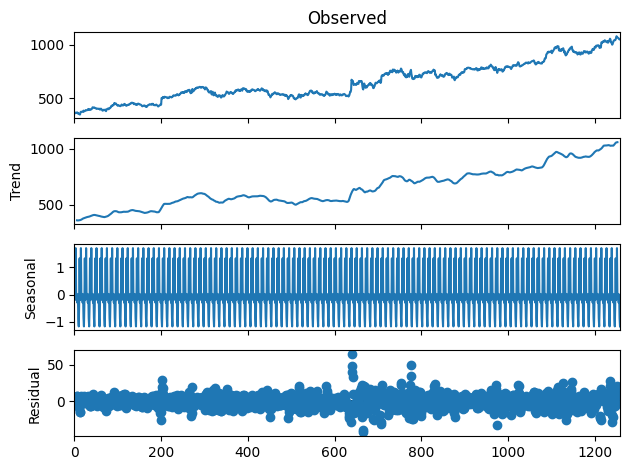

In [18]:
a=sn.tsa.seasonal_decompose(data.Close.values, period=12, model="additive")
fig=a.plot()

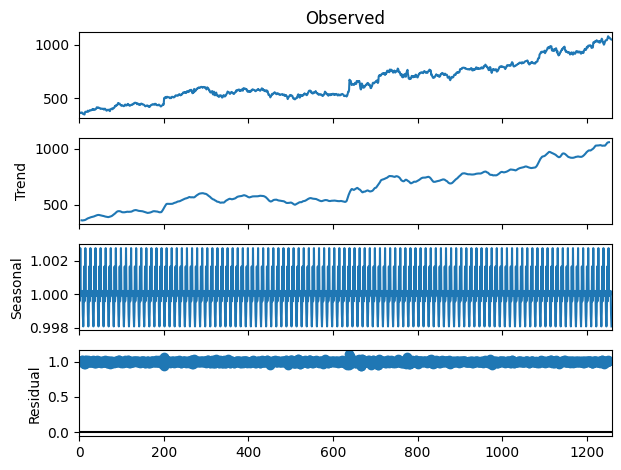

In [21]:
m=sn.tsa.seasonal_decompose(data.Close.values, period=12, model="multiplicative")
fig=m.plot()

In [23]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [24]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
adf_test(data.Close)

Results of Dickey-Fuller Test:
Test Statistic                   -0.250610
p-value                           0.932214
#Lags Used                        0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64


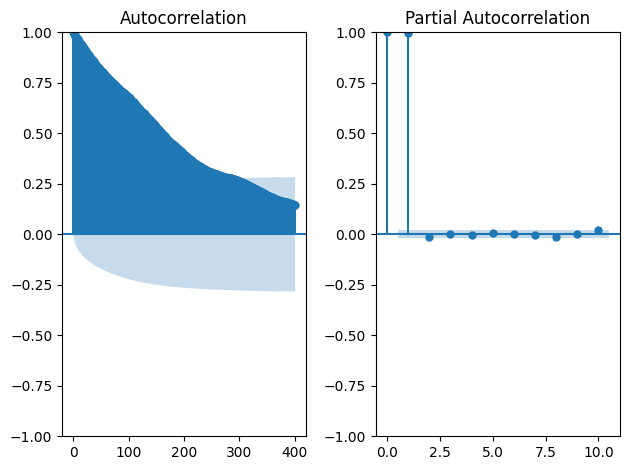

In [26]:
l=(1,2)
a=plt.subplot2grid(l,(0,0))
p=plt.subplot2grid(l,(0,1))
smt.graphics.plot_acf(data.Close, lags=400, ax=a, alpha=0.5)
smt.graphics.plot_pacf(data.Close, lags=10, ax=p, alpha=0.5)
plt.tight_layout()

In [28]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [29]:
model_df=data.loc[:,['Date','Close']].rename(columns={"Date":"ds", "Close":"y"})
model_df.head()

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701


In [30]:
model= Prophet(yearly_seasonality=True, interval_width=0.95, changepoint_prior_scale=0.1,n_changepoints= 100, seasonality_prior_scale= 10)
model.fit(model_df)

19:11:56 - cmdstanpy - INFO - Chain [1] start processing
19:11:58 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
ft=model.make_future_dataframe(periods=100)
pred=model.predict(ft)
pred[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1354,2018-04-04,1128.904519,1050.043832,1198.314015
1355,2018-04-05,1128.071377,1054.457617,1196.196694
1356,2018-04-06,1128.858015,1049.452084,1200.059691
1357,2018-04-07,1121.445440,1049.256486,1191.443961
1358,2018-04-08,1121.818935,1031.933701,1201.018403


<Figure size 1600x800 with 0 Axes>

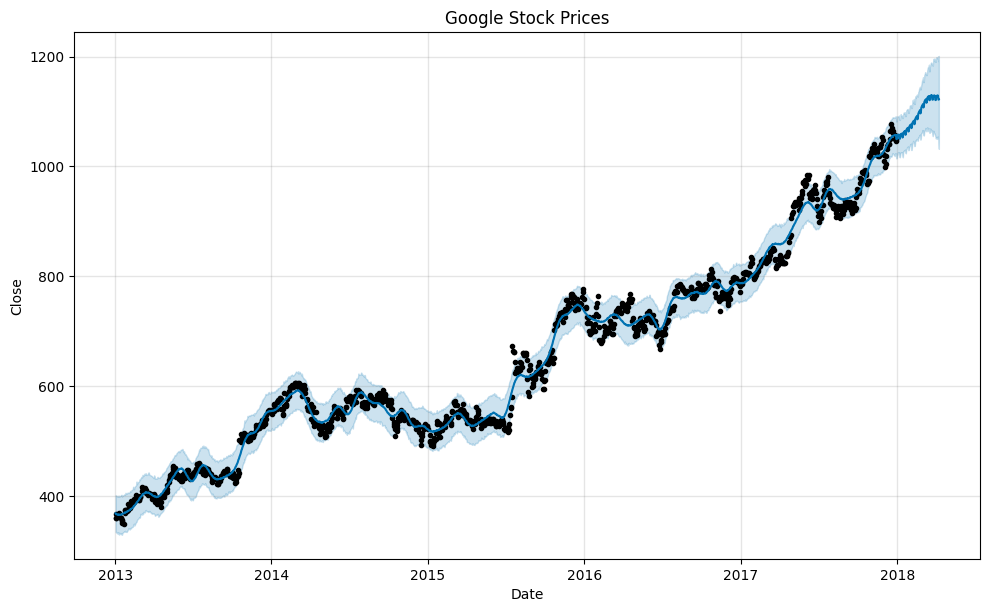

In [32]:
plt.figure(figsize=(16,8))
model.plot(pred, xlabel="Date", ylabel="Close")
plt.title('Google Stock Prices');

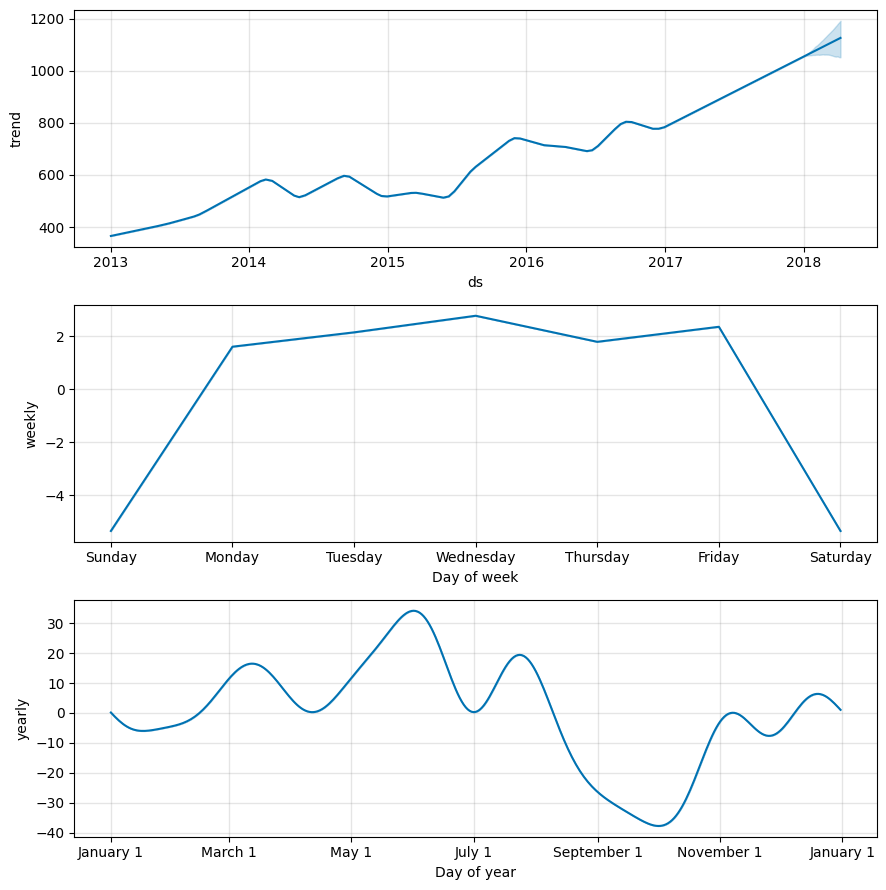

In [33]:
fig=model.plot_components(pred)

In [34]:
from sklearn.model_selection import ParameterGrid

In [35]:
params_grid = {'seasonality_prior_scale': [0.01, 10],
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
               'n_changepoints' : [100,150,200]}

In [36]:
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    print(p)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_prior_scale': 10}
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_prior_scale': 0.01}
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_prior_scale': 10}
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_prior_scale': 10}
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_prior_scale': 10}
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_prior_scale': 0.01}
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_prior_scale': 10}
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}
{'changepoint_prior_scale': 0.2

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
import random

In [40]:
import pandas as pd

model_parameters_list = []

df_train = model_df.head(1773)
df_test = model_df.tail(50)
for p in grid:
    test1 = pd.DataFrame()
    print(p)
    random.seed(0)
    model = Prophet(seasonality_prior_scale=p['seasonality_prior_scale'],
                    changepoint_prior_scale=p['changepoint_prior_scale'],
                    n_changepoints=p['n_changepoints'],
                    interval_width=0.95)
    model.fit(df_train)
    train_forecast = model.make_future_dataframe(periods=50, freq='D', include_history=False)
    train_forecast = model.predict(train_forecast)
    test = train_forecast[['ds', 'yhat']]
    MAPE = mean_absolute_percentage_error(df_test['y'], abs(test['yhat']))
    print('Mean Absolute Percentage Error (MAPE)------------------------------------', MAPE)
    
    model_parameters_list.append({'MAPE': MAPE, 'Parameters': p})

model_parameters = pd.DataFrame(model_parameters_list)

model_parameters.reset_index(drop=True, inplace=True)


19:15:47 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}


19:15:49 - cmdstanpy - INFO - Chain [1] done processing
19:15:49 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.04038776714809238
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


19:15:51 - cmdstanpy - INFO - Chain [1] done processing
19:15:51 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.038547025960800625
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_prior_scale': 0.01}


19:15:54 - cmdstanpy - INFO - Chain [1] done processing
19:15:54 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03937851197788699
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_prior_scale': 10}


19:15:56 - cmdstanpy - INFO - Chain [1] done processing
19:15:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03770157391028716
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}


19:15:59 - cmdstanpy - INFO - Chain [1] done processing
19:16:00 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.039589395888237705
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_prior_scale': 10}


19:16:03 - cmdstanpy - INFO - Chain [1] done processing
19:16:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.038251849803023694
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}


19:16:06 - cmdstanpy - INFO - Chain [1] done processing
19:16:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.038513441997671746
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


19:16:09 - cmdstanpy - INFO - Chain [1] done processing
19:16:09 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03673595632956781
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_prior_scale': 0.01}


19:16:12 - cmdstanpy - INFO - Chain [1] done processing
19:16:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03867398605437149
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_prior_scale': 10}


19:16:16 - cmdstanpy - INFO - Chain [1] done processing
19:16:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03709641407103628
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}


19:16:20 - cmdstanpy - INFO - Chain [1] done processing
19:16:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03879154767202785
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_prior_scale': 10}


19:16:24 - cmdstanpy - INFO - Chain [1] done processing
19:16:24 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03793417735789055
{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}


19:16:27 - cmdstanpy - INFO - Chain [1] done processing
19:16:27 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03994931852021204
{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


19:16:29 - cmdstanpy - INFO - Chain [1] done processing
19:16:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03892451614856605
{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_prior_scale': 0.01}


19:16:33 - cmdstanpy - INFO - Chain [1] done processing
19:16:33 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03955926700091351
{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_prior_scale': 10}


19:16:36 - cmdstanpy - INFO - Chain [1] done processing
19:16:36 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03841313619539428
{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}


19:16:40 - cmdstanpy - INFO - Chain [1] done processing
19:16:40 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03841050468000659
{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_prior_scale': 10}


19:16:44 - cmdstanpy - INFO - Chain [1] done processing
19:16:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03931118415232642
{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}


19:16:47 - cmdstanpy - INFO - Chain [1] done processing
19:16:47 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.037974666265435594
{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


19:16:50 - cmdstanpy - INFO - Chain [1] done processing
19:16:50 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03724671542661527
{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_prior_scale': 0.01}


19:16:54 - cmdstanpy - INFO - Chain [1] done processing
19:16:54 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03873014789873856
{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_prior_scale': 10}


19:16:59 - cmdstanpy - INFO - Chain [1] done processing
19:16:59 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.038241733688196444
{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}


19:17:03 - cmdstanpy - INFO - Chain [1] done processing
19:17:03 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03909182232782605
{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_prior_scale': 10}


19:17:07 - cmdstanpy - INFO - Chain [1] done processing
19:17:07 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03836108234583098
{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_prior_scale': 0.01}


19:17:10 - cmdstanpy - INFO - Chain [1] done processing
19:17:10 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.037776754373370316
{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


19:17:12 - cmdstanpy - INFO - Chain [1] done processing
19:17:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03637088799864724
{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_prior_scale': 0.01}


19:17:16 - cmdstanpy - INFO - Chain [1] done processing
19:17:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.03723815158615176
{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_prior_scale': 10}


19:17:19 - cmdstanpy - INFO - Chain [1] done processing
19:17:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.038510621070080304
{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_prior_scale': 0.01}


19:17:24 - cmdstanpy - INFO - Chain [1] done processing
19:17:24 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.037238066736076665
{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_prior_scale': 10}


19:17:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 0.037924390708729015


In [41]:
# Optimal parameters
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head(1)['Parameters'][0]

{'changepoint_prior_scale': 0.5,
 'n_changepoints': 100,
 'seasonality_prior_scale': 10}

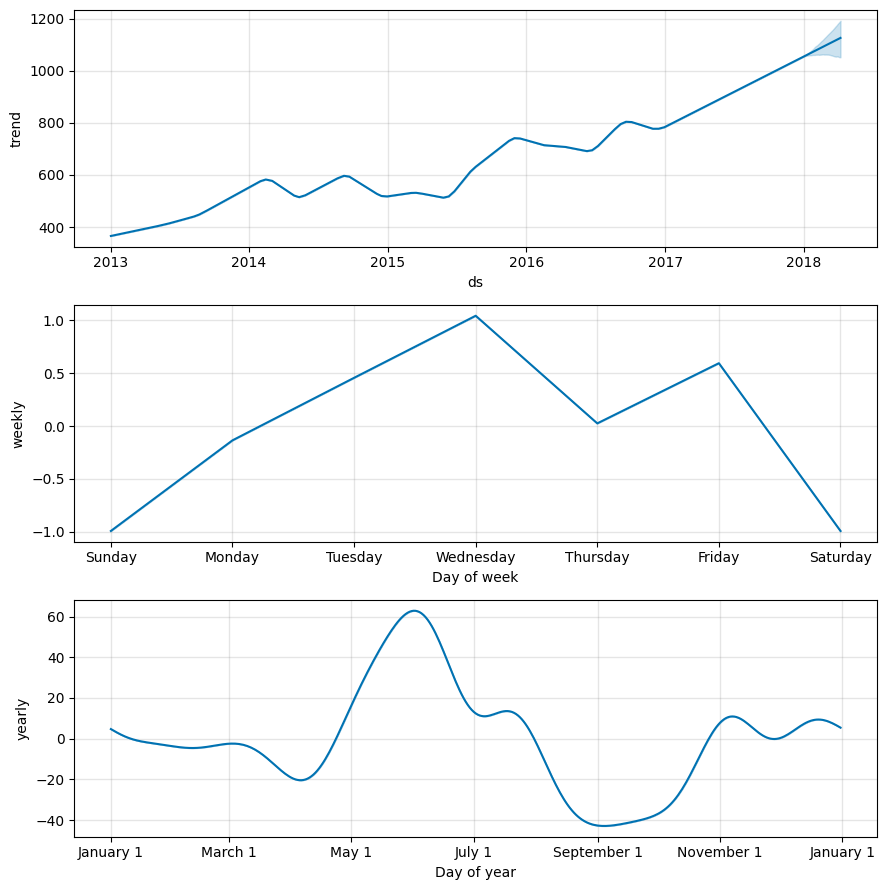

In [42]:
fig = model.plot_components(pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


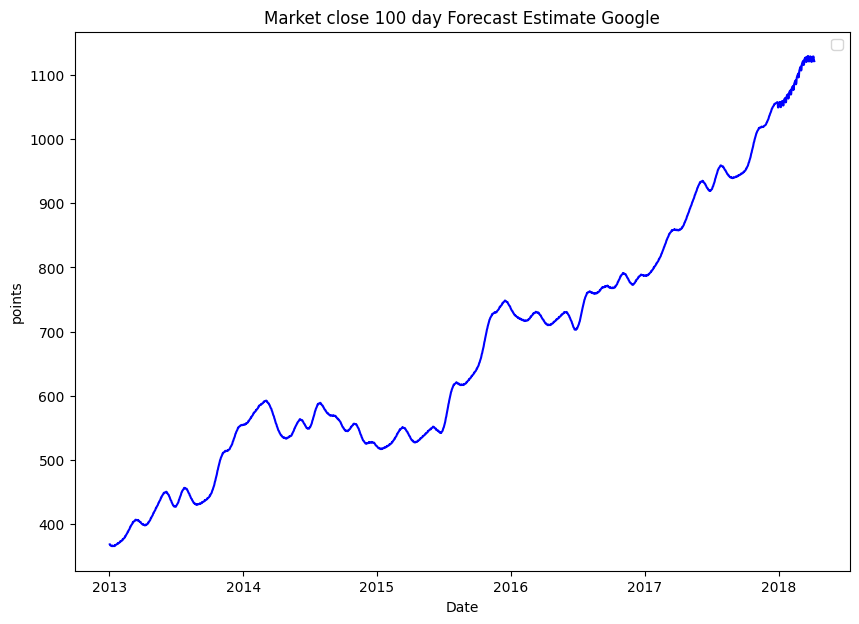

In [43]:
plt.figure(figsize=(10, 7))
plt.plot(pred['ds'], pred['yhat'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('points')
plt.title('Market close 100 day Forecast Estimate Google');